# Ejercicio 1

In [ ]:
import pandas as pd

In [ ]:

casos_ruta_archivo = '/content/casos_covid_bahia.csv'
camas_ruta = '/content/camas_covid_bahia.csv'
df_casos = pd.read_csv(casos_ruta_archivo)
df_camas = pd.read_csv(camas_ruta)

In [ ]:
df_casos

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


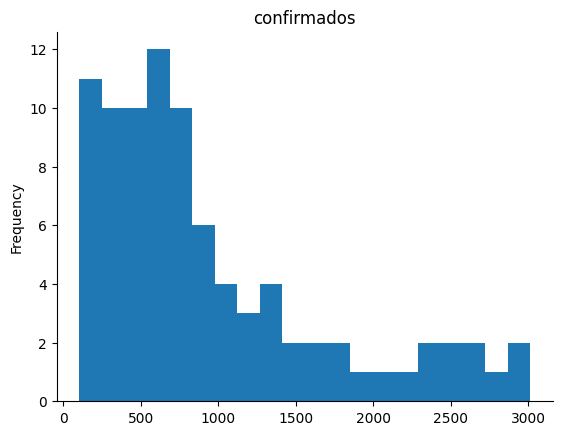

In [ ]:
# @title confirmados

from matplotlib import pyplot as plt
df_casos['confirmados'].plot(kind='hist', bins=20, title='confirmados')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


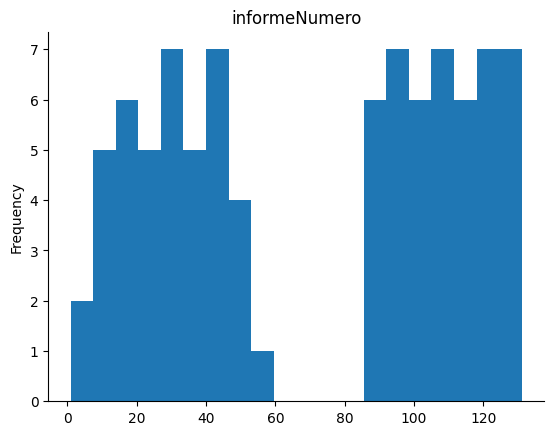

In [ ]:
# @title informeNumero

from matplotlib import pyplot as plt
df_camas['informeNumero'].plot(kind='hist', bins=20, title='informeNumero')
plt.gca().spines[['top', 'right',]].set_visible(False)

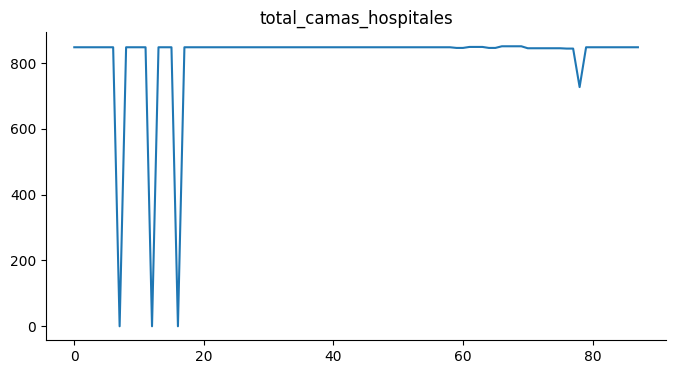

In [ ]:
# @title total_camas_hospitales

from matplotlib import pyplot as plt
df_camas['total_camas_hospitales'].plot(kind='line', figsize=(8, 4), title='total_camas_hospitales')
plt.gca().spines[['top', 'right']].set_visible(False)

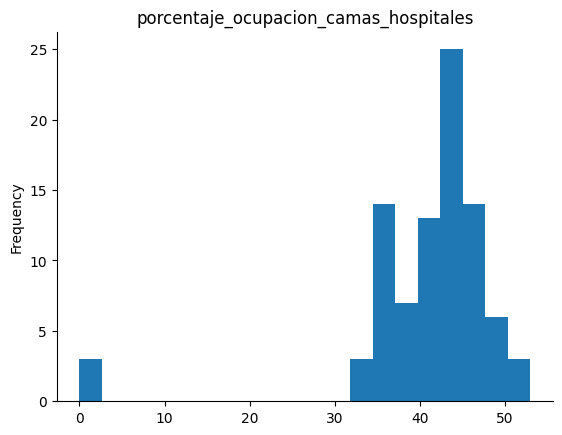

In [ ]:
# @title porcentaje_ocupacion_camas_hospitales

from matplotlib import pyplot as plt
df_camas['porcentaje_ocupacion_camas_hospitales'].plot(kind='hist', bins=20, title='porcentaje_ocupacion_camas_hospitales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from scipy.stats import kstest, norm

datos = df_casos['activos'].dropna()  # Asegúrate de quitar los NaN

# Normalizar los datos (la prueba de KS necesita comparar con N(0,1))
datos_normalizados = (datos - datos.mean()) / datos.std()

# Prueba de Kolmogorov-Smirnov contra la normal estándar
statistic, p_value = kstest(datos_normalizados, 'norm')

# Mostrar resultados
print(f'Estadístico KS: {statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("❌ Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("✅ No se puede rechazar la hipótesis nula: los datos podrían ser normales.")


Estadístico KS: 0.2871
Valor p: 0.0000
❌ Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


In [ ]:
from scipy.stats import shapiro

# Usamos los mismos datos que antes
df_casos = pd.read_csv(casos_ruta_archivo)
datos = df_casos['recuperados'].dropna()

# Prueba de Shapiro-Wilk
statistic, p_value = shapiro(datos)

# Resultados
print(f'Estadístico Shapiro-Wilk: {statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación
if p_value < 0.05:
    print("❌ Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("✅ No se puede rechazar la hipótesis nula: los datos podrían ser normales.")


Estadístico Shapiro-Wilk: 0.9253
Valor p: 0.0001
❌ Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


# Ejercicio 2

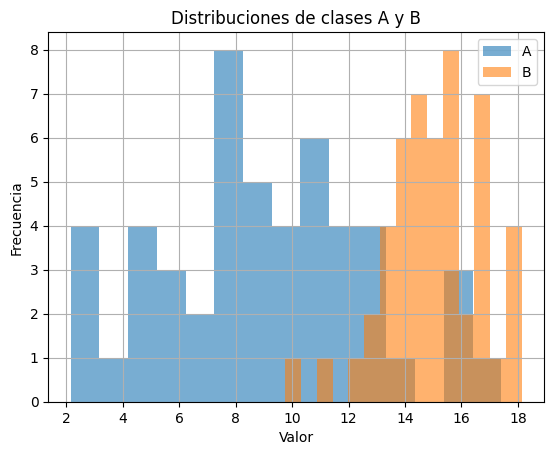

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score, precision_score, f1_score

# 1. Generar los datos simulados
np.random.seed(42)  # para reproducibilidad

# Parámetros de las distribuciones
N = 50
media_A, desvio_A = 10, 4
media_B, desvio_B = 15, 2

# Muestras gaussianas
valores_A = np.random.normal(loc=media_A, scale=desvio_A, size=N)
valores_B = np.random.normal(loc=media_B, scale=desvio_B, size=N)

# 2. Armar el DataFrame con etiquetas
df = pd.DataFrame({
    'Val.': np.concatenate([valores_A, valores_B]),
    'Etiq.': ['A'] * N + ['B'] * N
})

# Mapear etiquetas a 0 y 1 para análisis binario
df['target'] = df['Etiq.'].map({'A': 0, 'B': 1})

# 3. Visualización inicial (histograma)
plt.hist(valores_A, bins=15, alpha=0.6, label='A')
plt.hist(valores_B, bins=15, alpha=0.6, label='B')
plt.title("Distribuciones de clases A y B")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()

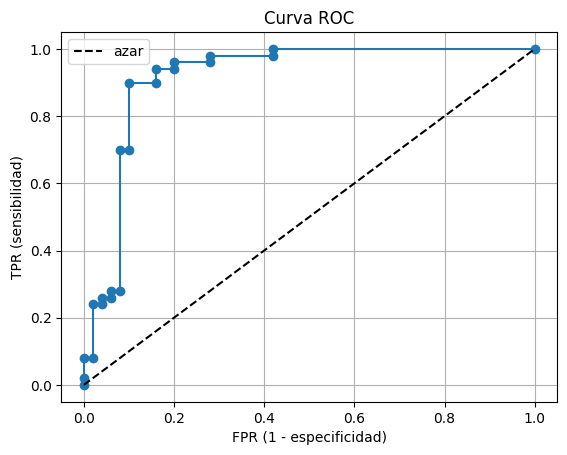

In [ ]:
# 4. Curva ROC
fpr, tpr, thresholds = roc_curve(df['target'], df['Val.'])

plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], 'k--', label='azar')
plt.xlabel('FPR (1 - especificidad)')
plt.ylabel('TPR (sensibilidad)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
J = tpr - fpr
print(J)
indice_optimo = np.argmax(J)
print(indice_optimo)
umbral_optimo = thresholds[indice_optimo]
print(umbral_optimo)

print(f"Umbral óptimo según Youden: {umbral_optimo:.4f}")
print(f"TPR: {tpr[indice_optimo]:.4f}, FPR: {fpr[indice_optimo]:.4f}")

[0.   0.02 0.08 0.06 0.22 0.2  0.22 0.2  0.22 0.2  0.62 0.6  0.8  0.74
 0.78 0.74 0.76 0.68 0.7  0.56 0.58 0.  ]
12
13.321564953554724
Umbral óptimo según Youden: 13.3216
TPR: 0.9000, FPR: 0.1000


In [44]:
# 5. Elegir umbral óptimo (por ahora a mano)
#umbral_optimo = 13.3  # podés probar diferentes valores

# 6. Clasificación basada en umbral
df['pred'] = (df['Val.'] >= umbral_optimo).astype(int)

# 7. Métricas de calidad
accuracy = accuracy_score(df['target'], df['pred'])
precision = precision_score(df['target'], df['pred'])
f1 = f1_score(df['target'], df['pred'])

print(f"Exactitud (accuracy): {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

Exactitud (accuracy): 0.90
Precisión: 0.90
F1-score: 0.90


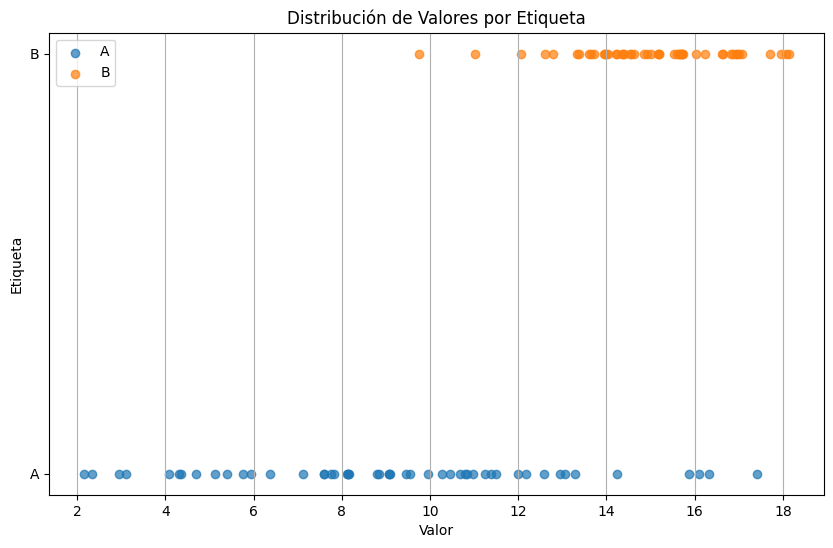

In [ ]:
# prompt: Quiero plotear el dataframe donde el Eje Y sean las Etiquetas A o B y en el eje X sean los valores de cada fila

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Graficar los puntos para cada etiqueta
plt.scatter(df[df['Etiq.'] == 'A']['Val.'], df[df['Etiq.'] == 'A']['Etiq.'], label='A', alpha=0.7)
plt.scatter(df[df['Etiq.'] == 'B']['Val.'], df[df['Etiq.'] == 'B']['Etiq.'], label='B', alpha=0.7)

plt.xlabel('Valor')
plt.ylabel('Etiqueta')
plt.title('Distribución de Valores por Etiqueta')
plt.yticks(['A', 'B']) # Asegura que solo se muestren las etiquetas A y B en el eje Y
plt.legend()
plt.grid(True, axis='x') # Cuadrícula en el eje X para mejor lectura de valores
plt.show()